### Import Libraries

In [22]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis

In [23]:
df=pd.read_csv("dataset_part_2.csv")
df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.


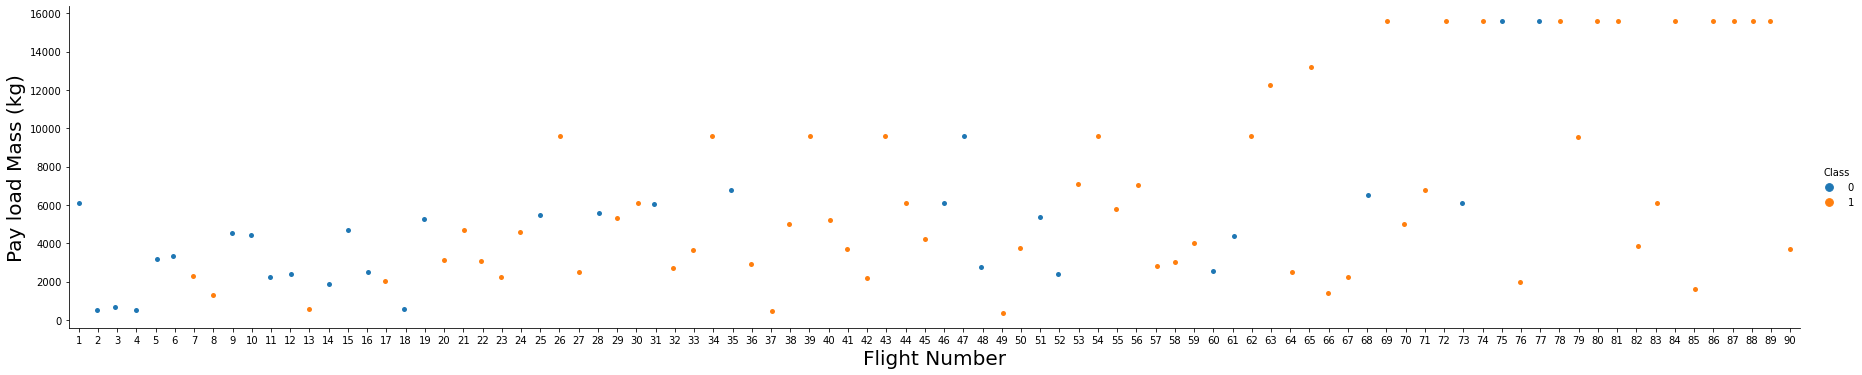

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### Visualize the relationship between Flight Number and Launch Site

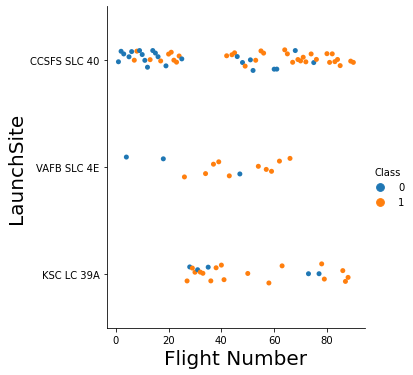

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='FlightNumber',y='LaunchSite',hue='Class',data=df)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel('LaunchSite',fontsize=20)
plt.show()

###  Visualize the relationship between Payload and Launch Site


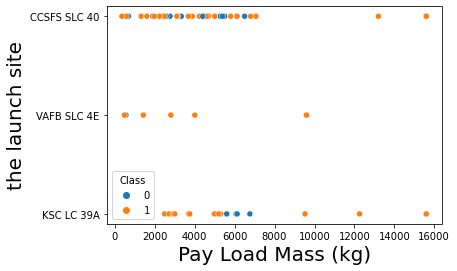

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.scatterplot(x='PayloadMass',y='LaunchSite',hue='Class',data=df)
plt.xlabel('Pay Load Mass (kg)',fontsize=20)
plt.ylabel('the launch site',fontsize=20)
plt.show()

### Visualize the relationship between success rate of each orbit type


In [11]:
mean=df.groupby(['Orbit'])['Class'].mean()
frame={'Orbit':mean.index,'Class_mean':mean}
data=pd.DataFrame(frame)
data=data.sort_values(by=['Class_mean'],ascending=False)

Text(0, 0.5, 'Mean')

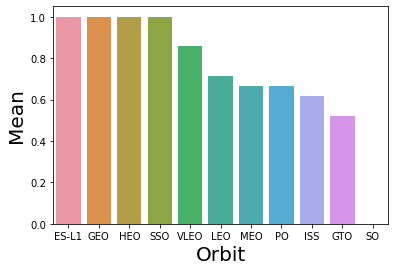

In [12]:
sns.barplot(x='Orbit',y='Class_mean',data=data)
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Mean",fontsize=20)

### Visualize the relationship between FlightNumber and Orbit type


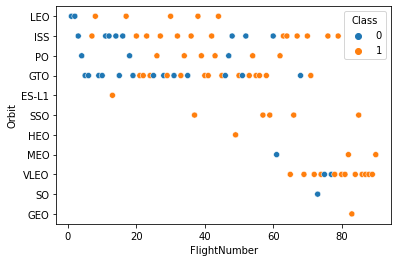

In [8]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x='FlightNumber',y='Orbit',hue='Class',data=df)
plt.xlabel('FlightNumber')
plt.ylabel('Orbit')
plt.show()

### Visualize the relationship between Payload and Orbit type


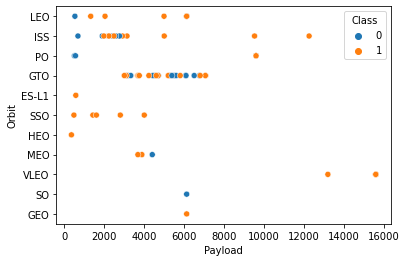

In [13]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.scatterplot(x='PayloadMass',y='Orbit',hue='Class',data=df)
plt.xlabel('Payload')
plt.ylabel('Orbit')
plt.show()

### Visualize the launch success yearly trend


In [14]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year(df["Date"])

['2010',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020']

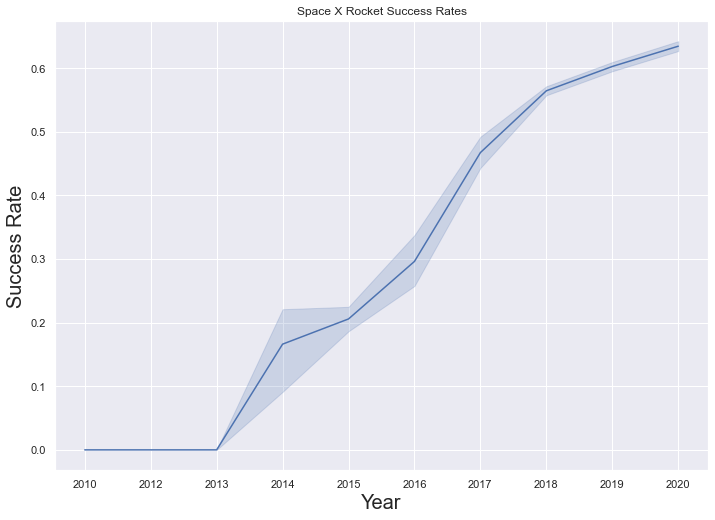

In [15]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success 
successratelist = []
successrate = 0.00
records = 1
data = 0
for x in df['Class']:
    data = x + data
    successrate = data/records
    successratelist.append(successrate)
    records= records +1
    
successratelist = np.array(successratelist)
d = {'successrate':successratelist,'year':year}
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=d, x="year", y="successrate" )

plt.xlabel("Year",fontsize=20)
plt.title('Space X Rocket Success Rates')
plt.ylabel("Success Rate",fontsize=20)
plt.show()

## Features Engineering


In [35]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features[['GridFins','Reused','Legs']]=features[['GridFins','Reused','Legs']].astype('object')
features.head()

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [36]:
features.dtypes

FlightNumber      int64
PayloadMass     float64
Orbit            object
LaunchSite       object
Flights           int64
GridFins         object
Reused           object
Legs             object
LandingPad       object
Block           float64
ReusedCount       int64
Serial           object
dtype: object

### Create dummy variables to categorical columns


In [37]:
features_hot=pd.get_dummies(features)
features_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Cast all numeric columns to `float64`

In [38]:
features_hot.astype('float64')
features_hot

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15600.000000,2,5.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,87,15600.000000,3,5.0,7,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,88,15600.000000,6,5.0,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,89,15600.000000,3,5.0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
features_hot.to_csv('dataset_part_3.csv', index=False)